In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

In [ ]:
def srch(x, y, mlist):
    for i in range(len(mlist)):
      if i==0:
        if (mlist[i][0]==x or mlist[i][0]==x-1) or mlist[i][0]==x+1:
          if (mlist[i][1]==y or mlist[i][1]==y-1) or mlist[i][1]==y+1:
           return 1
           break
      else:
        if (mlist[i][0]==x or mlist[i][0]==x-1) or mlist[i][0]==x+1:
          if (mlist[i][1]==y or mlist[i][1]==y-1) or mlist[i][1]==y+1:
            break
    if i==len(mlist)-1:
     return 0
    else:
      return 1

def dist(P, Q):
  d =((P[0]-Q[0])**2 + (P[1]-Q[1])**2)**0.5
  return d

def cluster_i(X, Centers):
  index=0
  d1=9999999999
  for i in range(len(Centers)):
    d2 = dist(X, Centers[i])
    if d2<=d1:
      index=i
    d1=d2
  return index

def fit(x, y, DLA_set):
  for i in range(1, Steps):
    temp=[]
    x_l = [x[i-1], x[i-1]+1, x[i-1]-1]
    y_l = [y[i-1], y[i-1]+1, y[i-1]-1]
    p = rnd.randint(0, 3)
    q = rnd.randint(0, 3)
    x[i] = x_l[p]
    y[i] = y_l[q]
    if x[i]<0 or y[i]<0:
      break
    if x[i]>S or y[i]>S:
      break
    if srch(x[i], y[i], DLA_set)==1:
      temp.append(x[i])
      temp.append(y[i])
      DLA_set.append(temp)
      break 


def Union(A, B):
  uni=A.copy()
  for x in B:
    if x not in A:
      uni.append(x)
    return uni

In [ ]:
S = 501
N = 50000 #no of random points
Steps = 10000

DLA_set=[[S//2, S//2]]

In [ ]:
for i in tqdm(range(0, 2500)):
    x = np.zeros(Steps)
    y = np.zeros(Steps)
    x[0]=rnd.randint(0,S)
    y[0]=rnd.randint(0,S)
    fit(x, y, DLA_set)

100%|██████████| 2500/2500 [14:07<00:00,  2.95it/s]


In [ ]:
len(DLA_set)

106

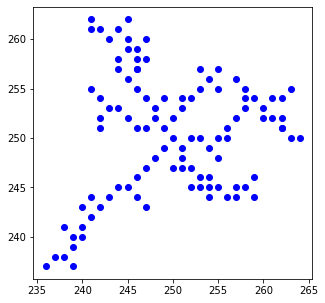

In [ ]:
z1=[]
z2=[]
for i in range(len(DLA_set)):
  z1.append(DLA_set[i][0])
  z2.append(DLA_set[i][1])

plt.figure(figsize=(5, 5))
#plotting the points
plt.scatter(z1, z2, color = 'blue')
plt.show()

In [ ]:
for i in tqdm(range(100)):
  X = np.array(DLA_set)
  #Training
  kmeans = KMeans(n_clusters =4 + i, init = 'k-means++', random_state = 0)
  y_kmeans = kmeans.fit_predict(X)
  Centers =kmeans.cluster_centers_[:, :].tolist()
  #Converting all clusters to list
  Y=[]
  for k in range(len(Centers)):
    Y.append(X[y_kmeans == k].tolist())
  for j in tqdm(range(100+i*8)):
    A = [rnd.randint(0,S), rnd.randint(0,S)]
    x = np.zeros(Steps)
    y = np.zeros(Steps)
    x[0]=A[0]
    y[0]=A[1]
    g=len(Y[cluster_i(A, Centers)])
    #fit(x, y, X[y_kmeans == cluster_i(A, Centers)].tolist())
    fit(x, y, Y[cluster_i(A, Centers)])
    h=len(Y[cluster_i(A, Centers)])
    #DLA_set = Union(DLA_set,Y[cluster_i(A, Centers)])
    if h>g:
      DLA_set.append(Y[cluster_i(A, Centers)][-1])

100%|██████████| 100/100 [2:17:19<00:00, 82.39s/it] 


In [ ]:
len(DLA_set)

1708

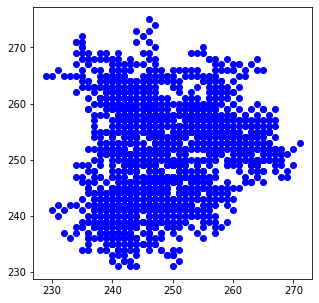

In [ ]:
z1=[]
z2=[]
for i in range(len(DLA_set)):
  z1.append(DLA_set[i][0])
  z2.append(DLA_set[i][1])

plt.figure(figsize=(5, 5))
# plotting the points
plt.scatter(z1, z2, color = 'blue')
plt.show()